## PHASE 4 PROJECT : GROUP 10.
## Project Title: Time Series Modelling of Real Estate Prices.

## Team Members
1. Celiajoy Omiah
2. Crystal Wanjiru
3. Kelvin Rotich
4. Miriam Nguru
5. Paul Mbugua
6. Stephen Butiya



## Introduction
This project aims to construct a time series model leveraging Zillow's dataset to assist real estate investors in making well-informed investment decisions.


## Overview
In this project we aim to do the following:

1. Loading the dataset.
2. Gaining a comprehensive understanding of the dataset.
3. dentifying and selecting our target variable.
4. Preparing the dataset, which involves tasks such as cleaning, checking for multicollinearity, and ensuring data integrity.
5. Encoding categorical variables to make them compatible with our modeling process.
6. Building several models to explore different approaches.
7. Evaluating the performance of our models using appropriate metrics.
8. Utilizing our trained models for making predictions.
9. Drawing meaningful insights and conclusions based on our findings.

##  Business understanding
Real estate investment stands as a profitable and ever-evolving industry, demanding meticulous analysis and strategic decision-making. A fictitious real estate investment firm is currently in search of insights to pinpoint the top five zip codes offering promising investment opportunities. To tackle this inquiry, we leverage historical data sourced from Zillow Research.

##  Objectives
The objectives of this project:
* To identify the top 5 zip codes, cities and states that offer the best investment potential in terms of real estate value. By analyzing historical trends and patterns, the project aims to provide actionable insights to the investment firm, enabling them to make informed decisions on where to allocate their resources.
* To analyze the historical data of the real estate value by looking into the monthly, quarterly, semi-annual and annual patterns over time. This will help in identifying trend and seasonality in the data.
* To create a time series model that will be able to predict future Real Estate Value.

##  Data Understanding

The dataset encompasses details on a range of attributes, including RegionID, RegionName, City, State, Metro, SizeRank, CountyName, and the value representing real estate prices. This dataset, known as the Zillow Housing Dataset, has been obtained from the Zillow Research Page.

To gain an initial insight into the structure of our dataset, let's load and preview the data.

In [46]:
#Importing the data libraries
import numpy as np
import pandas as pd
import itertools
import warnings
warnings.filterwarnings('ignore')

#importing visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing modeling libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet
import optuna
import joblib

In [3]:
# Function to load and examine the data

def load_and_examine_data(file_path):
    try:
        # Load the data from the specified file path
        data = pd.read_csv(file_path)

        # Display the shape, columns and the first few rows of the dataset
        print("----------------------------Details about the data----------------------------\n")
        print("----------------------------Shape of the dataset----------------------------\n")
        display(data.shape)
        print()
        print("----------------------------Columns of the dataset----------------------------\n")
        display(data.columns)
        print()
        print("----------------------------Head of the dataset----------------------------\n")
        display(data.head())
        print()
        # Display information about the dataset

        print("\n----------------------------Data information ----------------------------\n")
        display(data[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank']].info())
        print("\n----------------------------Descriptive Statistics of the dataset ----------------------------\n")
        display(data.describe())

        return data

    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# data file path
file_path = "zillow_data.csv" 
data = load_and_examine_data(file_path)

----------------------------Details about the data----------------------------

----------------------------Shape of the dataset----------------------------



(14723, 272)


----------------------------Columns of the dataset----------------------------



Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)


----------------------------Head of the dataset----------------------------



,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500




----------------------------Data information ----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RegionID    14723 non-null  int64 
 1   RegionName  14723 non-null  int64 
 2   City        14723 non-null  object
 3   State       14723 non-null  object
 4   Metro       13680 non-null  object
 5   CountyName  14723 non-null  object
 6   SizeRank    14723 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 805.3+ KB


None


----------------------------Descriptive Statistics of the dataset ----------------------------



,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


The dataset contains the following columns:
* Region Id - is unique ID for the Regions

* Region Name contains the zip code for the region

* City Specific city name of housing data

* Metro Name of the metro city around that region

* County Name this is the county name of that region

* SizeRank this is the ranking done based on the size of that region

* Date this refers to a point in time

## Data Preparation

The code in the cell below  creates a copy of a DataFrame named `data` called `data2`. It then calculates the Return On Investment (ROI) by dividing the values in the '2018-04' column by the values in the '1996-04' column and subtracting 1. The calculated ROI values are added as a new column named `Return On Investment` in the copied DataFrame.

In [4]:
# Create a copy of the original DataFrame
data2 = data.copy()

# Calculate Return On Investment and add a new column to the copied DataFrame
data2['Return On Investment'] = (data2['2018-04'] / data2['1996-04']) - 1

# Display the first few rows of the updated DataFrame
data2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Return On Investment
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,0.365295
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,0.567966
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,0.571798


In [5]:
# Sorting the values based on ROI
data2.sort_values(by='Return On Investment', ascending=False, inplace=True)
data2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Return On Investment
117,62022,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,...,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,11.189940
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,10.535523
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,9.942505
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300,9.403061
106,62026,11215,New York,NY,New York,Kings,107,225700.0,227500.0,229400.0,...,2201100,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900,8.941958


Selects specific columns, including `RegionID`, `RegionName`, `City`, `State`, `Metro`, `CountyName`, `SizeRank`, and `Return On Investment`, from the DataFrame `data2`, drops any columns not in this selection, and displays the first few rows of the updated DataFrame.

In [6]:
# Select specific columns from the DataFrame
columns_selected = data2[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Return On Investment']]

# Iterate through all columns in the DataFrame
for column in data2.columns:

    # Drop columns that are not in the selected list
    if column not in columns_selected:
        data2.drop(column, axis=1, inplace = True)
        
# Display the first few rows of the updated DataFrame
data2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Return On Investment
117,62022,11211,New York,NY,New York,Kings,118,11.189940
1155,62033,11222,New York,NY,New York,Kings,1156,10.535523
475,62027,11216,New York,NY,New York,Kings,476,9.942505
191,60639,7302,Jersey City,NJ,New York,Hudson,192,9.403061
106,62026,11215,New York,NY,New York,Kings,107,8.941958


In [7]:
# Looking at the shape of data2
data2.shape

(14723, 8)

In this section, we define a function `data_prep` that performs checks for missing values, duplicated values, and placeholder values in the dataset.

In [81]:
# Creating a function that returns null, duplicated and placeholder values in the dataset.
def data_prep(df):
    print('-------------------------Missing Values Check---------------------------------------\n')
    print(f'Number of null values in each column in the dataset:\n{df.isnull().sum()}\n')
    print('-------------------------Duplicated Values Check------------------------------------\n')
    print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}\n')
    print('-------------------------Placeholder Values Check-----------------------------------\n')
    for column in df.columns:
        unique_values = df[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
        placeholder_count = len(placeholders)
    
        print(f"Column: '{column}'")
        print(f"Placeholders found: {placeholders}")
        print(f"Count of placeholders: {placeholder_count}\n")
        
# Checking in our dataset.
data_prep(data2)

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
RegionID                   0
RegionName                 0
City                       0
State                      0
Metro                   1043
CountyName                 0
SizeRank                   0
Return On Investment    1039
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'RegionID'
Placeholders found: []
Count of placeholders: 0

Column: 'RegionName'
Placeholders found: []
Count of placeholders: 0

Column: 'City'
Placeholders found: []
Count of placeholders: 0

Column: 'State'
Placeholders found: []
Count of placeholders: 0

Column: 'Metro'
Placeholders found: []
Count of placeholders: 0

Column: 'CountyName'
Placeholders found: []
Count of placeholder

In [82]:
# Remove rows with missing values (NaN) from the DataFrame 'data2' in-place
data2.dropna(inplace = True)

# Display the count of missing values in each column after dropping NaN values
data2.isna().sum()

RegionID                0
RegionName              0
City                    0
State                   0
Metro                   0
CountyName              0
SizeRank                0
Return On Investment    0
dtype: int64

We write a function `check_outliers` to identify and print the number of outliers in numeric columns of a dataframe. 
It then selects numeric columns from `data2` using `select_dtypes` and calls the `check_outliers` with the specified DataFrame and columns.

In [83]:
#Checking for outliers
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr
        
# Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

#Call the function
columns_to_check = data2.select_dtypes(include = ['number'])
check_outliers(data2, columns_to_check)

RegionID
Number of outliers: 101

RegionName
Number of outliers: 0

SizeRank
Number of outliers: 0

Return On Investment
Number of outliers: 700



The code below generates a boxplot to visually inspect and identify potential outliers in the numeric columns of the DataFrame `data2`, providing a comprehensive overview of the distribution and variability of the data

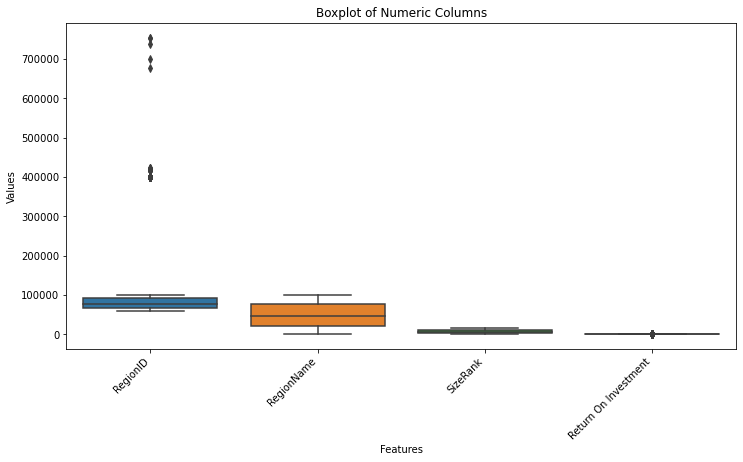

In [84]:
# Plotting a boxplot to check for outliers
features_to_plot = data2.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show()

The boxplots indicates there are outliers present but we cant drop them because they are actual events recorded.

The code below takes a wide-form dataframe (`df`) and melts it into a long-form DataFrame, converts the `Date` column to datetime format, drops rows with missing `value` entries, and finally returns a dataframe grouped by date with the mean value for each date.

In [8]:
#Melt Data Function
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    #Melt the DataFrame
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='Date')
    
    #Convert the 'Date' column to datatime format
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    
    #Drop rows with missing 'value' entries
    melted = melted.dropna(subset=['value'])

    #Group by 'Date' and calculate the mean of the 'value' column
    return melted.groupby('Date').aggregate({'value':'mean'})

The code below reshapes the DataFrame `data` using the pandas melt_data function and stores the result in a new DataFrame `data3`, providing an initial view of the reshaped data.

In [9]:
# Reshape the DataFrame 'data' using the 'melt_data' function and store the result in 'data3'
data3 = melt_data(data)

# Display the first few rows of the reshaped DataFrame 'data3'
data3.head()

,value
Date,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


In [10]:
# Checking the shape of data3
data3.shape

(265, 1)

In [88]:
# Call the 'data_prep' function to perform data preparation steps on the DataFrame 'data3'
data_prep(data3)

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
value    0
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'value'
Placeholders found: []
Count of placeholders: 0



In [89]:
data2['RegionName'] = data2['RegionName'].astype('str')

## Exprolatory Data Analysis

#### Univariate Analysis

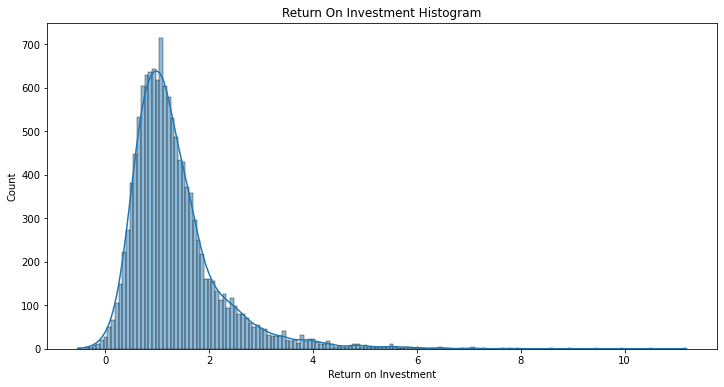

In [90]:
# A histogram of Returns on Investment
plt.figure(figsize=(12,6))
sns.histplot(data2['Return On Investment'], bins= 'auto', kde=True)
plt.title('Return On Investment Histogram')
plt.xlabel('Return on Investment')
plt.show()

The returns on investment had a postive skewness.

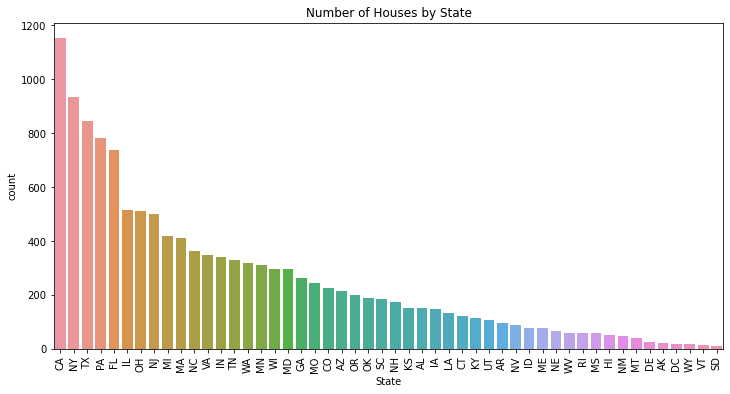

In [91]:
# Countplot for the number of houses by state
plt.figure(figsize=(12,6))
sns.countplot(data2['State'], order=data2['State'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Number of Houses by State')
plt.show()

The number of houses was highest in California, New York, Texas, Pennsylvania, and Florida, respectively. The states with the least number of houses were South Dakota, Vermont, Washington DC, Wyoming, and Arkansas, respectively. 

#### Bivariate Analysis

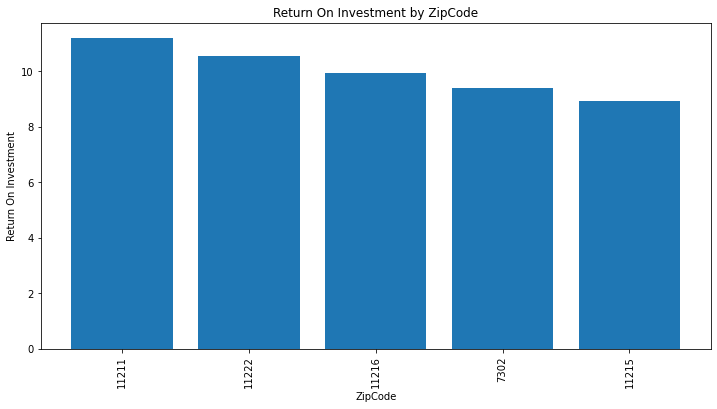

In [92]:
# Top five zipcodes with highest ROI
plt.figure(figsize= (12,6)) 
plt.bar(data2['RegionName'][:5], data2['Return On Investment'][:5])
plt.xticks(rotation=90)
plt.title('Return On Investment by ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Return On Investment')
plt.show()

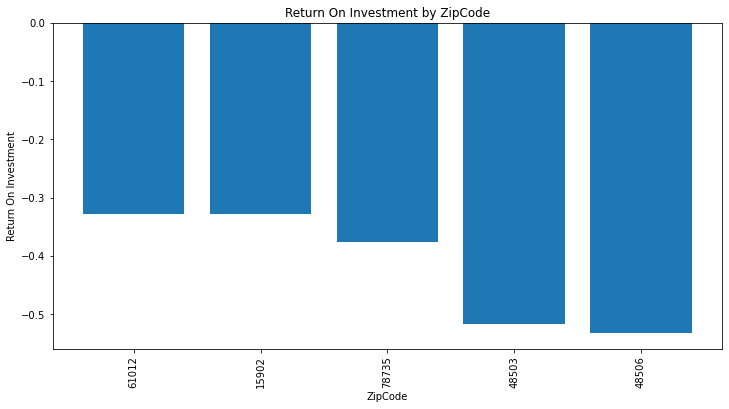

In [93]:
# Regions with the lowest returns on investment
plt.figure(figsize= (12,6)) 
plt.bar(data2['RegionName'][-5:], data2['Return On Investment'][-5:])
plt.xticks(rotation=90)
plt.title('Return On Investment by ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Return On Investment')
plt.show()

The zip codes with the best ROI performance were:
1. `11211` - Brooklyn, New York.
2. `11222` - Brooklyn, New York.
3. `11216` - Brooklyn, New York.
4. `7302` - Jersey City, New Jersey.
5. `11215` - Brooklyn, New York.

The zip codes with the worst ROI performance were:
1. `48506` - Flint, Michigan.
2. `48503` - Flint, Michigan.
3. `78735` - Austin, Texas.
4. `15902` - Johnstown, Pennsylvania.
5. `6102` - Hartford, Connecticut.

We can now go ahead and check on the ROI performance per city.

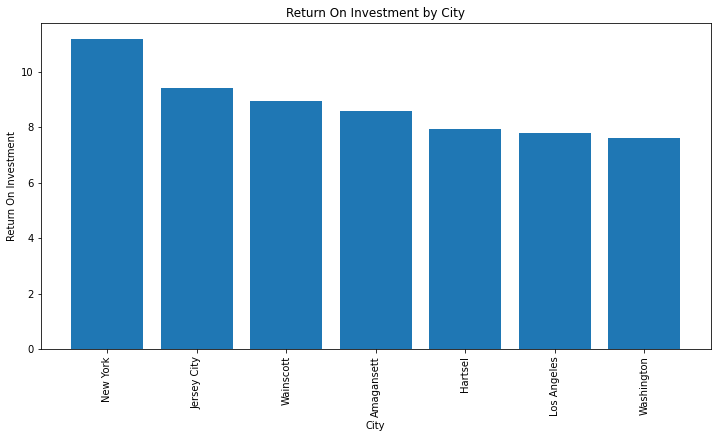

In [94]:
# Top five cities with highest ROI
plt.figure(figsize= (12,6)) 
plt.bar(data2['City'][:10], data2['Return On Investment'][:10])
plt.xticks(rotation=90)
plt.title('Return On Investment by City')
plt.xlabel('City')
plt.ylabel('Return On Investment')
plt.show()

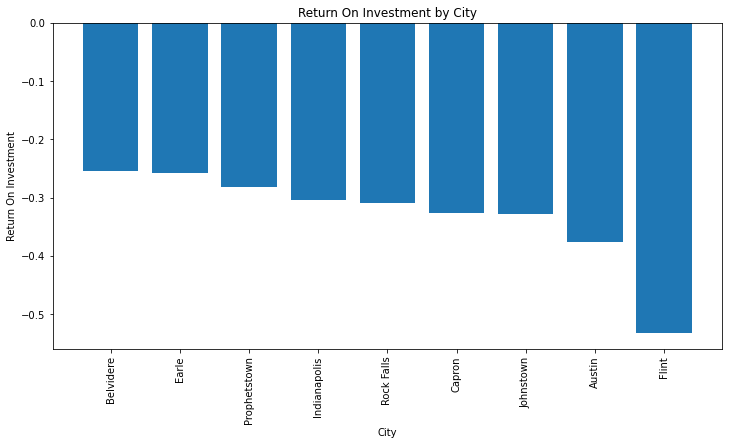

In [95]:
# Cities with the lowest returns on investment
plt.figure(figsize= (12,6)) 
plt.bar(data2['City'][-10:], data2['Return On Investment'][-10:])
plt.xticks(rotation=90)
plt.title('Return On Investment by City')
plt.xlabel('City')
plt.ylabel('Return On Investment')
plt.show()

The cities with the highest returns on investment are New York, Jersey City, Wainscott, Amagansett, Hartsell, Los Angeles, and Washington. However, the cities with the lowest returns on investment are Flint, Austin, Johnstown, Carpron, Rock Falls, Indianapolis, Prophetstown, Earle, and Belvidere. Now, proceeding to the best and worst performing states based on the returns on investment.

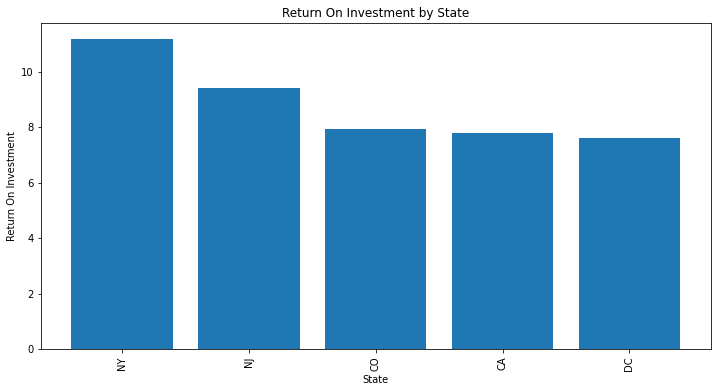

In [96]:
# Top five states with highest ROI 
plt.figure(figsize= (12,6)) 
plt.bar(data2['State'][:10], data2['Return On Investment'][:10])
plt.xticks(rotation=90)
plt.title('Return On Investment by State')
plt.xlabel('State')
plt.ylabel('Return On Investment')
plt.show()

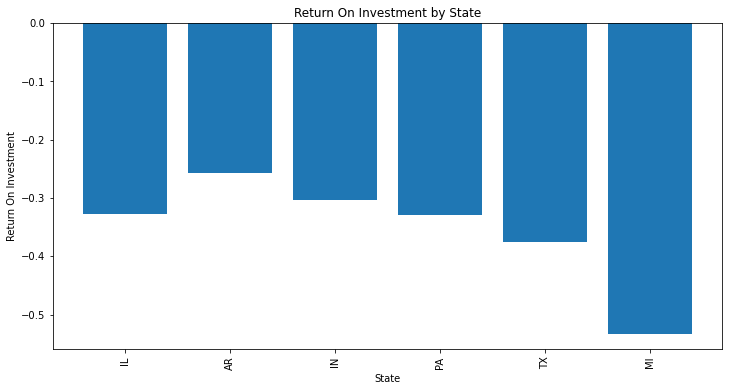

In [97]:
# Bottom five states with highest ROI 
plt.figure(figsize= (12,6)) 
plt.bar(data2['State'][-10:], data2['Return On Investment'][-10:])
plt.xticks(rotation=90)
plt.title('Return On Investment by State')
plt.xlabel('State')
plt.ylabel('Return On Investment')
plt.show()

The states with the highest reurns on investment are New York, New Jersey, Colorado, California, and Washington DC. On the other hand, the states with the lowest returns on investment are Michigan, Texas, Pennsylvania, Indiana, Arkansas, and Illinois. We can go ahead and conduct time series analysis. 

### Time Series Analysis

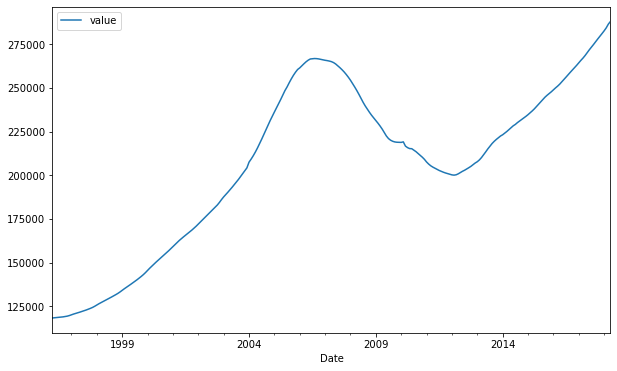

In [98]:
# Creating a line plot of the data
data3.plot(figsize=(10,6));

In [99]:
# Resampling
quarterly_df = data3.resample('Q').mean()
quarterly_df.head()

,value
Date,
1996-06-30,118418.530157
1996-09-30,118786.950697
1996-12-31,119383.652441
1997-03-31,120520.710319
1997-06-30,121659.059242


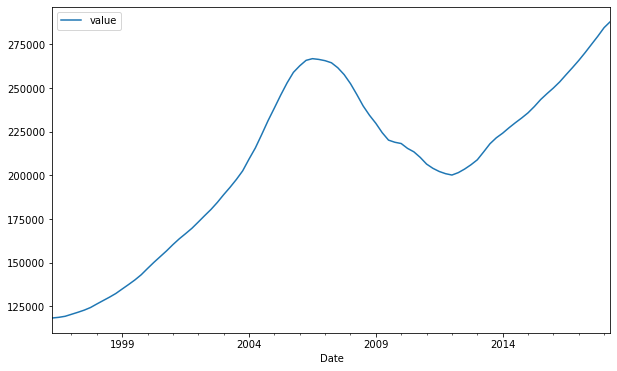

In [100]:
# Plotting data resampled quarterly
quarterly_df.plot(figsize=(10,6));

In [101]:
# Semi-annual resampling
semiannual_df = data3.resample('2Q').mean()
semiannual_df.head()

,value
Date,
1996-06-30,118418.530157
1996-12-31,119085.301569
1997-06-30,121089.884780
1997-12-31,123640.518816
1998-06-30,127404.630915


<AxesSubplot:xlabel='Date'>

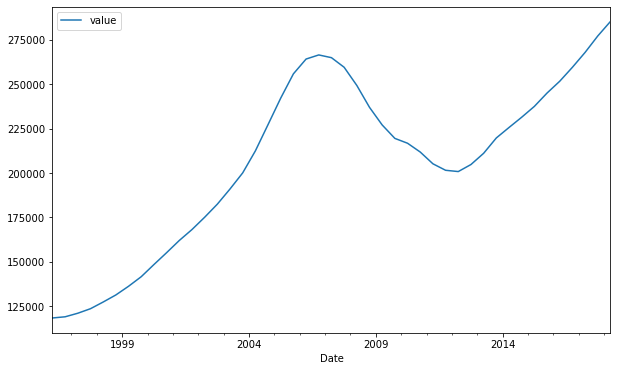

In [102]:
# Plotting data resampled semi-annually
semiannual_df.plot(figsize=(10,6))

In [103]:
# Annual Resampling
annual_df = data3.resample('Y').mean()
annual_df.head()

,value
Date,
1996-12-31,118863.044431
1997-12-31,122365.201798
1998-12-31,129392.784516
1999-12-31,138962.489345
2000-12-31,151834.752563


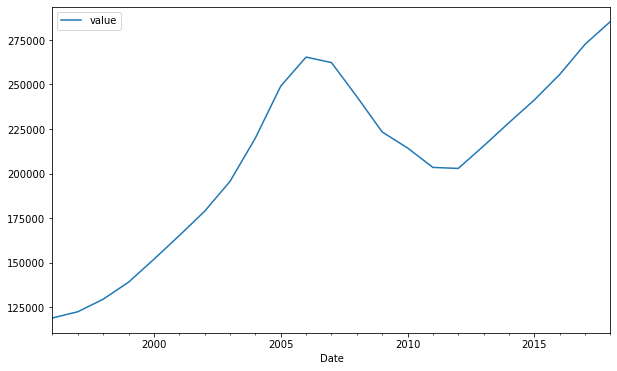

In [104]:
# A plot of data resampled annually
annual_df.plot(figsize=(10,6));

Based on the monthly, quarterly, semi-annual, and annual graphs, we can see that there is an upward trend from 1996 to 2018. However, there is a decrease between 2006 and 2013, which is attributed to the recession and the 2008 market crash. We can now look at the rolling statistics. 

In [105]:
# Rolling mean
roll_mean = data3.rolling(window=12, center=False).mean()
roll_std = data3.rolling(window=12, center=False).std()

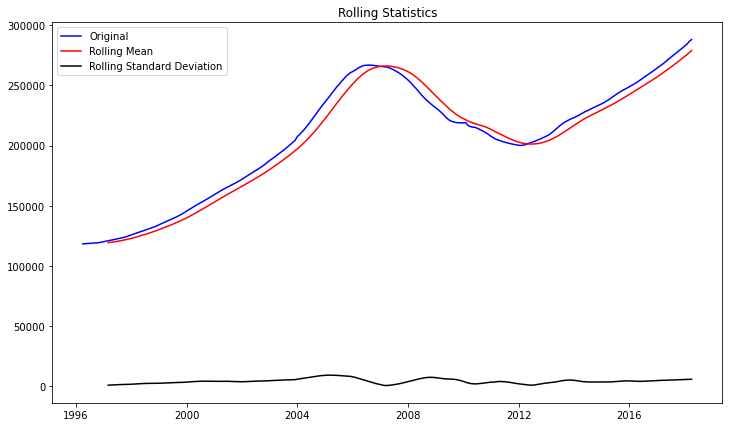

In [106]:
# Plotting the rolling statistics 
fig = plt.figure(figsize=(12,7))
plt.plot(data3, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False);

In [107]:
# Dickey-Fuller Test
dftest = adfuller(data3)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -1.885145
p-value                          0.339082
#Lags Used                       2.000000
Number of Observations Used    262.000000
Critical Values (1%)            -3.455558
Critical Values (5%)            -2.872636
Critical Values (10%)           -2.572683
dtype: float64


Based on the plot and the p-value, we can see that our data is not stationary. This will be dealt with in the modeling part of this project. 

## Time Series Modeling  

### Preprocessing

Previously, we saw that our data was not stationary and to meet the assumptions of the ARIMA model we need to make the data stationary

In [11]:
#We start with a differencing of one
df_diff = data3.diff(periods=1).dropna()
df_diff.head()

,value
Date,
1996-05-01,119.921076
1996-06-01,118.379129
1996-07-01,115.646010
1996-08-01,127.185034
1996-09-01,147.274189


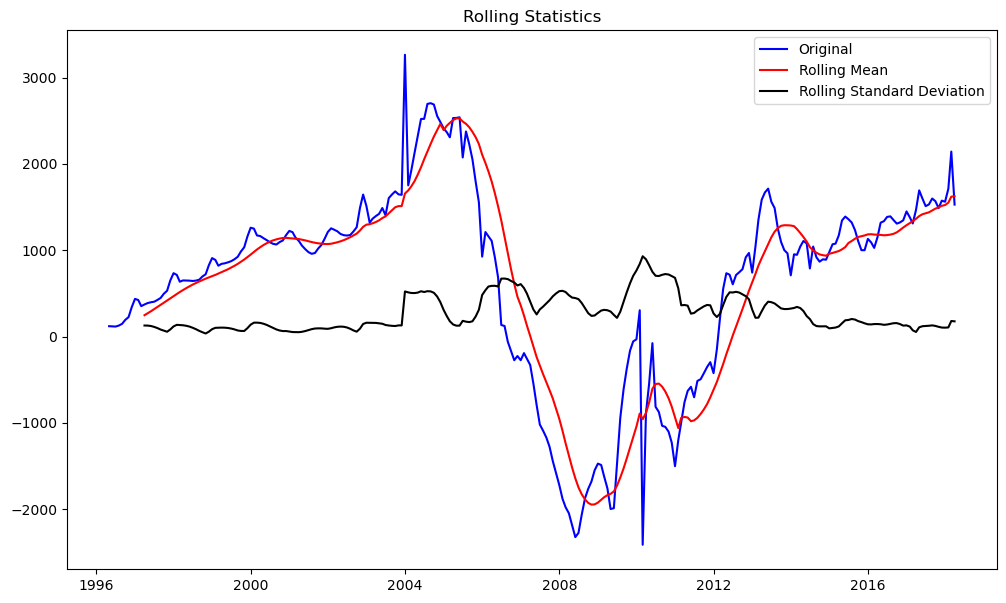

In [12]:
#Plotting to see if the data is stationary

# Calculate rolling mean and rolling standard deviation
roll_mean2 = df_diff.rolling(window=12, center=False).mean()
roll_std2 = df_diff.rolling(window=12, center=False).std()

#Plot
fig = plt.figure(figsize=(12,7))
plt.plot(df_diff, color='blue', label='Original')
plt.plot(roll_mean2, color='red', label='Rolling Mean')
plt.plot(roll_std2, color='black', label='Rolling Standard Deviation')

plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False);

From the plot we can see that our data is not stationary, for confirmation we have the Dickey-Fuller test below:  

In [13]:
#Dickey-Fuller Test
dftest = adfuller(df_diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.548782
p-value                          0.104052
#Lags Used                      13.000000
Number of Observations Used    250.000000
Critical Values (1%)            -3.456781
Critical Values (5%)            -2.873172
Critical Values (10%)           -2.572969
dtype: float64


The null hypothesis for the Dickey-Fuller test is that the time series is not stationary.  
The p-value is at 0.104 more than 0.05 and the test statistic more than the critical values, therefore we fail to reject the null hypothesis and conclude that our data is not stationary

In [14]:
#Differencing the data again
df_diff2 = df_diff.diff(periods=1).dropna()
df_diff2.head()

,value
Date,
1996-06-01,-1.541947
1996-07-01,-2.733119
1996-08-01,11.539024
1996-09-01,20.089155
1996-10-01,45.717626


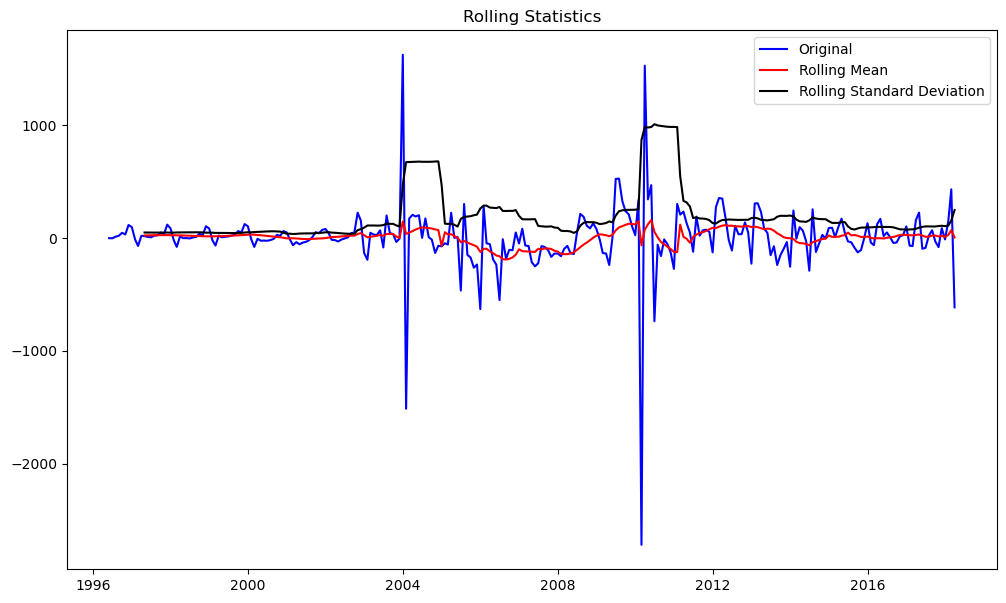

In [15]:
#Plotting to check stationarity

#Calculating rolling mean and rolling standard deviation 
roll_mean3 = df_diff2.rolling(window=12, center=False).mean()
roll_std3 = df_diff2.rolling(window=12, center=False).std()

#Plot
fig = plt.figure(figsize=(12,7))
plt.plot(df_diff2, color='blue', label='Original')
plt.plot(roll_mean3, color='red', label='Rolling Mean')
plt.plot(roll_std3, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False);

In [16]:
#Dickey-Fuller Test
dftest = adfuller(df_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                 -21.111269
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    262.000000
Critical Values (1%)            -3.455558
Critical Values (5%)            -2.872636
Critical Values (10%)           -2.572683
dtype: float64


The p-value is at 0.00 which is less than 0.05 and the test statistic is less than the critical values, therefore we therefore  reject the null hypothesis and conclude that our data is now stationary.

Before creating our model we will plot the Autocorrelation and Partial Autocorrelation Graphs to decide on the order of the baseline ARIMA model

#### Autocorrelation Graph

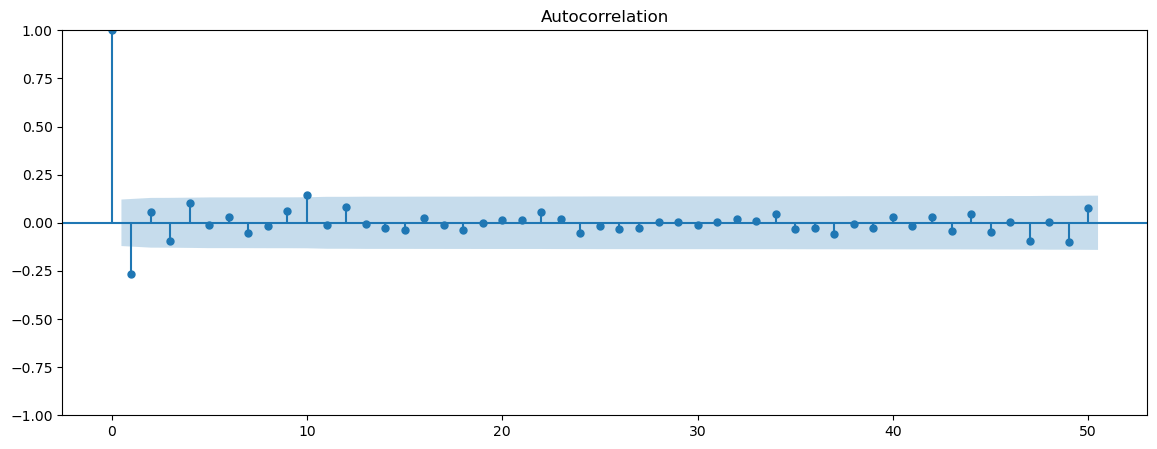

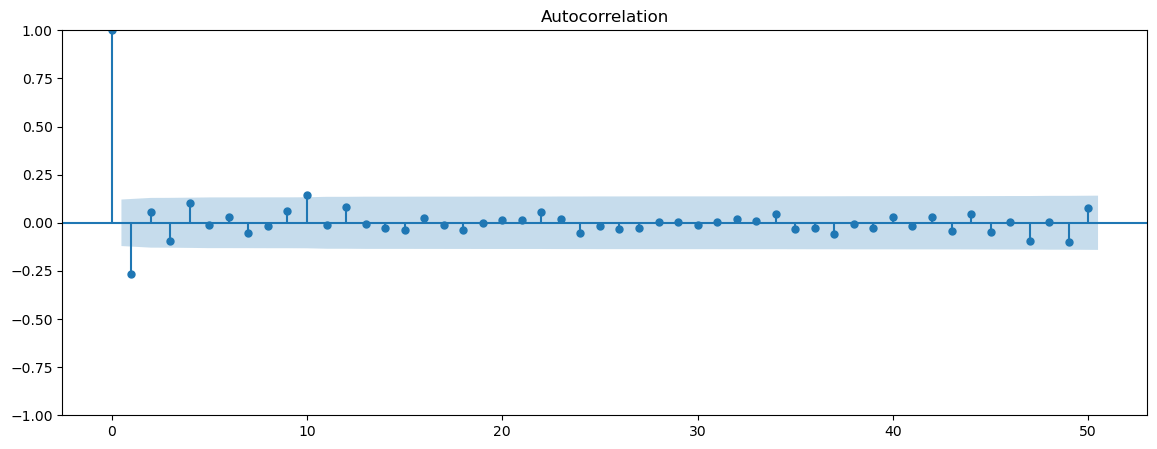

In [17]:
# Plotting ACF
rcParams['figure.figsize'] = 14, 5
plot_acf(df_diff2, lags=50)

#### Partial Autocorrelation

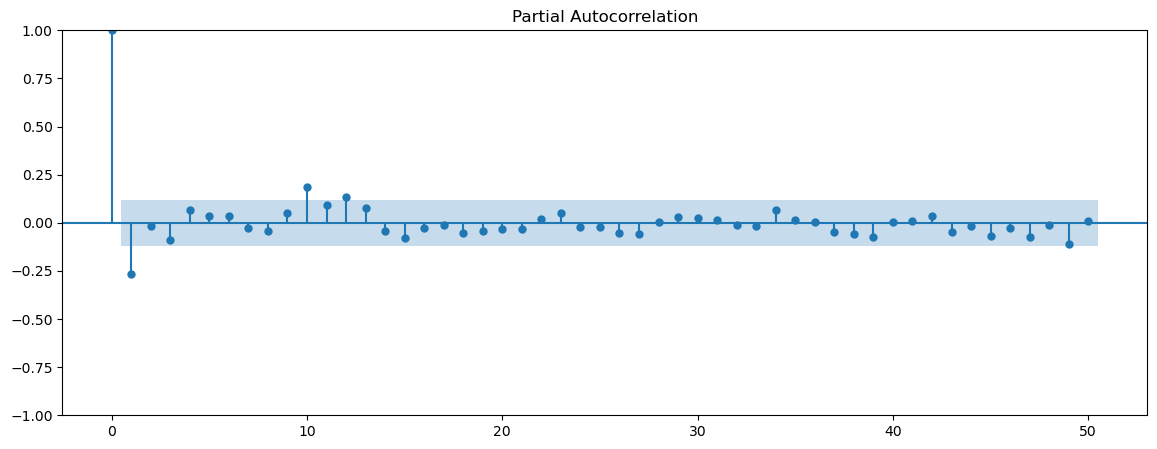

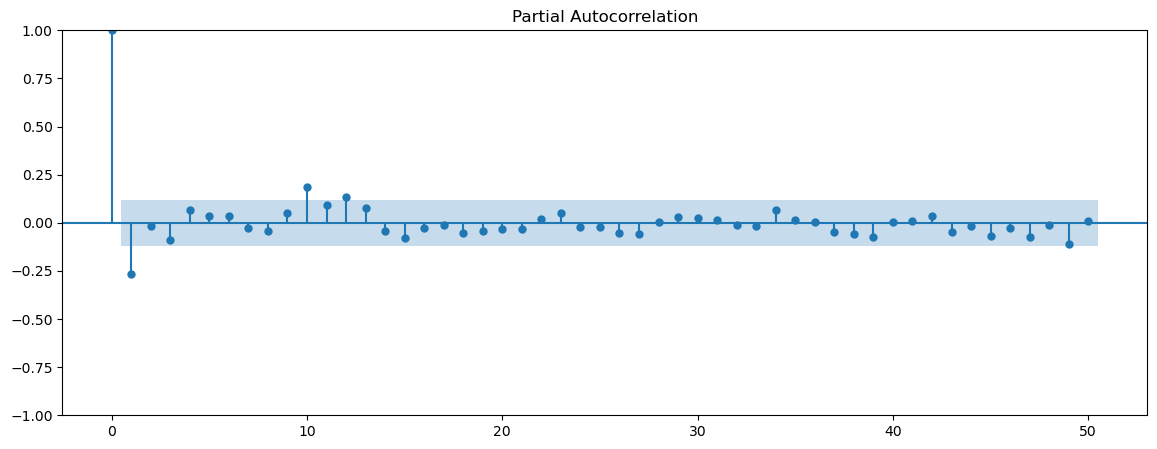

In [18]:
# Plotting PACF
rcParams['figure.figsize'] = 14, 5
plot_pacf(df_diff2, lags=50)

For better model evaluation we decide to split our data to have a train and test data

In [19]:
#Data splitting at 75% of the data
train_size = int(len(df_diff2) * 0.75) 
train, test = df_diff2.iloc[:train_size], df_diff2.iloc[train_size:]
print(train.shape)
print(test.shape)

(197, 1)
(66, 1)


In [20]:
#Function to calculate rmse and mae
def metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f'RMSE: {rmse}\nMAE: {mae}')

In [118]:
#The baseline model
baseline_model = ARIMA(train, order=(1, 0, 1))
res_arima = baseline_model.fit()
y_hat_baseline = res_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
res_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  197
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1405.623
Date:                Wed, 17 Jan 2024   AIC                           2819.246
Time:                        15:42:55   BIC                           2832.379
Sample:                    06-01-1996   HQIC                          2824.562
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3159     18.280      0.181      0.856     -32.512      39.144
ar.L1         -0.1605      0.154     -1.041      0.298      -0.463       0.142
ma.L1         -0.1332      0.160     -0.831      0.406      -0.448       0.181
sigma2      9.222e+04   2719.465     33.912      0.000    8.69e+04    9.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8119.58
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              56.02   Skew:                            -2.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
metrics(test, y_hat_baseline)

RMSE: 157.32480030970973
MAE: 113.60089999888011


From the baseline model we have an RMSE of 157.32 and a Mean Absolute Error of 113.60, which is not a bad score but to try and improve it we tried a different model

In [120]:
model2 = ARIMA(train, order=(1, 0, 3))
res_arima2 = model2.fit()
y_hat_2 = res_arima2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
res_arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  197
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -1404.750
Date:                Wed, 17 Jan 2024   AIC                           2821.500
Time:                        15:42:56   BIC                           2841.199
Sample:                    06-01-1996   HQIC                          2829.475
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2703     17.671      0.185      0.853     -31.364      37.905
ar.L1         -0.7117      0.474     -1.500      0.134      -1.642       0.218
ma.L1          0.4291      0.475      0.902      0.367      -0.503       1.361
ma.L2         -0.1512      0.141     -1.073      0.283      -0.427       0.125
ma.L3         -0.0475      0.083     -0.570      0.568      -0.211       0.116
sigma2       9.14e+04   2933.369     31.158      0.000    8.56e+04    9.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8368.28
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              55.69   Skew:                            -2.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [121]:
metrics(test, y_hat_2)

RMSE: 157.22932153947718
MAE: 113.54069874063455


The second ARIMA model has an RMSE of 157.23 and MAE of 113.54 which is slightly better than the baseline

In [122]:
model3 = ARIMA(train, order=(3, 0, 1))
res_arima3 = model3.fit()
y_hat_3 = res_arima3.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
res_arima3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  197
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -1404.519
Date:                Wed, 17 Jan 2024   AIC                           2821.038
Time:                        15:42:57   BIC                           2840.737
Sample:                    06-01-1996   HQIC                          2829.012
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3520     17.886      0.187      0.851     -31.705      38.409
ar.L1         -0.6035      0.643     -0.939      0.348      -1.863       0.657
ar.L2         -0.1371      0.183     -0.751      0.453      -0.495       0.221
ar.L3         -0.1077      0.069     -1.556      0.120      -0.243       0.028
ma.L1          0.3167      0.646      0.491      0.624      -0.949       1.582
sigma2      9.324e+04   2926.708     31.858      0.000    8.75e+04     9.9e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8471.97
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              54.63   Skew:                            -2.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
metrics(test, y_hat_3)

RMSE: 157.32182714980738
MAE: 113.61188254252112


The third model, ARIMA(3,0,1) has an RMSE of 157.32 and MAE of 113.61 which is slightly worse than the second model

In [124]:
#Code to iterate through the values of p,d and q modeling each combination 
p = range(0, 10)
q = range(0, 10)
d = range(0, 2)

pdq_combinations = list(itertools.product(p, d, q))

rmse = []
order = []

for pdq in pdq_combinations:
    try:
        model = ARIMA(train, order=pdq).fit()
        y_hat = model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
        error = np.sqrt(mean_squared_error(test, y_hat))
        order.append(pdq)
        rmse.append(error)
    except: 
        continue

In [125]:
#Results from the code above
results = pd.DataFrame(index=order, data=rmse, columns=['RMSE'])
min_value_order = results.idxmin().values[0]
min_rmse = results.min().values[0]
print(min_value_order)

(5, 0, 3)


According to the code above the best ARIMA model is ARIMA(5,0,3)

In [126]:
final_ARIMA_model = ARIMA(train, order=(5, 0, 3))
res_arima4 = final_ARIMA_model.fit()
y_hat_4 = res_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
res_arima4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  197
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -1401.529
Date:                Wed, 17 Jan 2024   AIC                           2823.059
Time:                        15:48:50   BIC                           2855.891
Sample:                    06-01-1996   HQIC                          2836.350
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8075     19.494      0.195      0.845     -34.400      42.015
ar.L1          1.0976      1.077      1.019      0.308      -1.013       3.208
ar.L2         -0.0648      1.526     -0.042      0.966      -3.055       2.925
ar.L3         -0.4696      0.529     -0.888      0.375      -1.506       0.567
ar.L4          0.0309      0.357      0.087      0.931      -0.669       0.731
ar.L5         -0.0632      0.093     -0.682      0.495      -0.245       0.118
ma.L1         -1.4287      1.445     -0.989      0.323      -4.261       1.404
ma.L2          0.4495      2.092      0.215      0.830      -3.651       4.550
ma.L3          0.3149      1.056      0.298      0.766      -1.756       2.386
sigma2      8.859e+04   7.71e+04      1.149      0.251   -6.25e+04     2.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10085.17
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              39.37   Skew:                            -2.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
metrics(test, y_hat_4)

RMSE: 157.32480030970973
MAE: 113.60089999888011


The final ARIMA model only changes slightly from the third model
From the above ARIMA models the best is the second ARIMA model ARIMA(1,0,3)
The main issue with the ARIMA model is that it relies on stationarity, homoscedasticity and normality and since our data does not follow a normal distribution we decide to use another model, Prophet.

#### Prophet

To be able to build a model with Prophet we need to reset the index of our data

In [21]:
#Resetting the index of the train data
train2 = train.reset_index()
train2 = train2.rename(columns={'Date': 'ds', 'value': 'y'})
train2.head()

,ds,y
0,1996-06-01,-1.541947
1,1996-07-01,-2.733119
2,1996-08-01,11.539024
3,1996-09-01,20.089155
4,1996-10-01,45.717626


In [22]:
#Resetting the index of the test data
test2 = test.reset_index()
test2 = test2.rename(columns={'Date': 'ds', 'value': 'y'})
test2.head()

,ds,y
0,2012-11-01,137.976166
1,2012-12-01,49.803678
2,2013-01-01,-227.312789
3,2013-02-01,305.301682
4,2013-03-01,307.782048


In [25]:
#Prophet model with default hyperparameters
prophet_model1 = Prophet()
prophet_model1.fit(train2)
future_dates = prophet_model1.make_future_dataframe(periods=len(test2), freq='M') 
forecast = prophet_model1.predict(future_dates)
test_predictions1 = forecast['yhat'][-len(test2):]
metrics(test2['y'], test_predictions1)

10:06:01 - cmdstanpy - INFO - Chain [1] start processing
10:06:03 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 292.16288908498603
MAE: 209.622069698736


From the model above the RMSE is at 182.49 and 124.96 which are worse than our previous models 

In [26]:
# Manual Hyperparameter tuning for the prophet model
param_grid = {
    "changepoint_prior_scale": [0.01, 0.1, 1.0],
    "seasonality_mode": ["additive", "multiplicative"],
}

# Split your data into training and validation sets

# Perform manual hyperparameter tuning
best_rmse = np.inf
best_params = None

for changepoint_prior_scale in param_grid["changepoint_prior_scale"]:
    for seasonality_mode in param_grid["seasonality_mode"]:
        model = Prophet(
            changepoint_prior_scale=changepoint_prior_scale,
            seasonality_mode=seasonality_mode,
        )

        # Fit the model on the training data
        model.fit(train2)

        # Make predictions on the validation set
        future = model.make_future_dataframe(periods=len(test2))
        forecast = model.predict(future)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test2["y"], forecast["yhat"][:len(test2)]))

        # Check if the current combination of hyperparameters is the best
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {
                "changepoint_prior_scale": changepoint_prior_scale,
                "seasonality_mode": seasonality_mode,
            }

print("Best Hyperparameters:", best_params)

10:06:13 - cmdstanpy - INFO - Chain [1] start processing
10:06:13 - cmdstanpy - INFO - Chain [1] done processing
10:06:14 - cmdstanpy - INFO - Chain [1] start processing
10:06:14 - cmdstanpy - INFO - Chain [1] done processing
10:06:15 - cmdstanpy - INFO - Chain [1] start processing
10:06:15 - cmdstanpy - INFO - Chain [1] done processing
10:06:15 - cmdstanpy - INFO - Chain [1] start processing
10:06:15 - cmdstanpy - INFO - Chain [1] done processing
10:06:16 - cmdstanpy - INFO - Chain [1] start processing
10:06:16 - cmdstanpy - INFO - Chain [1] done processing
10:06:17 - cmdstanpy - INFO - Chain [1] start processing
10:06:18 - cmdstanpy - INFO - Chain [1] done processing


Best Hyperparameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


The parameters chosen are a changepoint_prior_scale of 0.1 and a multiplicative seasonality_mode 

In [27]:
# Creating a Prophet model using the suggested hyperparameters
param_dict = {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}
prophet_model2 = Prophet(**param_dict)
prophet_model2.fit(train2)
future_dates = prophet_model2.make_future_dataframe(periods=len(test2), freq='M')
forecast = prophet_model2.predict(future_dates)
test_predictions2 = forecast['yhat'][-len(test2):]
metrics(test2['y'], test_predictions2)

10:06:24 - cmdstanpy - INFO - Chain [1] start processing
10:06:25 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 165.69953994266658
MAE: 123.97454587151972


The tuned model gives an RMSE of 165 and MAE of 123 which is better than the first prophet model

Below we perform hyperparameter tuning with optuna:

In [28]:
# Define the objective function to optimize
def objective(trial):
    # Create a Prophet model with suggested hyperparameters
    model = Prophet(
        changepoint_prior_scale=trial.suggest_float("changepoint_prior_scale", 0.001, 0.5),
        seasonality_mode=trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"]),
    )
    # Fit the model to the training data
    model.fit(train2)

    # Make predictions on the validation set
    future_dates = model.make_future_dataframe(periods=len(test2), freq='M')
    forecast = model.predict(future_dates)
    test_predictions = forecast['yhat'][-len(test2):]
    
    # Calculate evaluation metric (e.g., RMSE)
    rmse = np.sqrt(mean_squared_error(test2['y'], test_predictions))

    return rmse  # Minimize RMSE

# Create an Optuna study
study = optuna.create_study(direction="minimize")

# Run the optimization
study.optimize(objective, n_trials=100)  # Adjust the number of trials as needed

# Get the best hyperparameters
best_params = study.best_params

# Create the best model using the optimal hyperparameters
best_model = Prophet(**best_params)
# Fit the best model to the entire dataset
best_model.fit(train2)

# Predicting the values
future_dates = best_model.make_future_dataframe(periods=len(test2), freq='M')
forecast = best_model.predict(future_dates)
test_predictions3 = forecast['yhat'][-len(test2):]
metrics(test2['y'], test_predictions3)

[I 2024-01-18 10:08:41,591] A new study created in memory with name: no-name-3241296f-9a6a-4f45-b23a-2be40c6548b2
10:08:43 - cmdstanpy - INFO - Chain [1] start processing
10:08:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-18 10:08:44,618] Trial 0 finished with value: 157.27254343533167 and parameters: {'changepoint_prior_scale': 0.04540672480761311, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 157.27254343533167.
10:08:44 - cmdstanpy - INFO - Chain [1] start processing
10:08:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-18 10:08:46,905] Trial 1 finished with value: 345.10020778700886 and parameters: {'changepoint_prior_scale': 0.3941069301005619, 'seasonality_mode': 'additive'}. Best is trial 0 with value: 157.27254343533167.
10:08:47 - cmdstanpy - INFO - Chain [1] start processing
10:08:48 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-18 10:08:48,895] Trial 2 finished with value: 1290.4314551777927 and parameters: {'chan

RMSE: 157.03486070278385
MAE: 113.45699843939173


From the model above and the best parameters chosen by optuna our prophet model has an RMSE of 157.05 and an MAE of 113.42 which is better than the other models and therefore we chose it as our final model 

## Conclusion  
From the project we were able to answer all our objectives and had the following conclusion:  

Based on our findings the best zipcodes to invest in are: 
1. 11211 - Brooklyn, New York
2. 11222 - Brooklyn, New York
3. 11216 - Brooklyn, New York
4. 7302 - Jersey City, New Jersey  
5. 11215 - Brooklyn, New York  

The best cities to invest in are:
1. New York
2. Jersey City
3. Winscott
4. Amagansett
5. Hartsel

The best states to invest in are:  
1. New York
2. New Jersey 
3. Colorado  
4. Carlifonia  
5. Washington DC

To answer the second object we noted that there is an upward trend with our data, which suggests that the real estate value increases with time. There is no clear way to determine which time period is suitable to invest in Real Estate, since the data contained no seasonality.  


To answer the third objective we created a predictive model that is able to forecast future real estate values


## Recommendation
From our finding it is advisable to invest in Real Estate, the data showed an upward trend, indicating appreciating values over the years.

To the real estate investors, we recommend investing in the following states, New York, New Jersey, Colorado, Carlifornia and Washington DC, from the analysis these states showed promising Returns on Investment. The best zipcodes were found within the states mentioned, these are, 11211 - Brooklyn, New York, 11222 - Brooklyn, New York, 11216 - Brooklyn, New York, 7302 - Jersey City, New Jersey and 11215 - Brooklyn, New York.  

As a way to mitigate risk we recommend using the model created to forecast future values of Real Estate.  




### Next Steps  

To collect more data on Real Estate Values - more data will better inform the model and lead to better predictive results.

Continuous model training to improve accuracy

## Saving the model

In [32]:
# Save the model using joblib
joblib.dump(best_model, 'prophet_model.pkl')

['prophet_model.pkl']

## Model deployment using streamlit.

In [47]:
%%writefile model_app.py
import streamlit as st
import pandas as pd
from prophet import Prophet
import joblib

# Load your time-series data
df = pd.read_csv("zillow_data.csv")

def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.

    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    #Melt the DataFrame
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='Date')
    
    #Convert the 'Date' column to datatime format
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    
    #Drop rows with missing 'value' entries
    melted = melted.dropna(subset=['value'])

    #Group by 'Date' and calculate the mean of the 'value' column
    return melted.groupby('Date').aggregate({'value':'mean'})

data = melt_data(df)
data_diff = data.diff(periods=1).dropna()
data_diff2 = data_diff.diff(periods=1).dropna()

data_diff2.reset_index(inplace=True)
data_diff2 = data_diff2.rename(columns={'Date': 'ds', 'value': 'y'})

model = joblib.load('prophet_model.pkl') 
model.fit(data_diff2)

# Define a function to make predictions
def predict_future(n_months):
    future_dates = model.make_future_dataframe(periods=n_months, freq='MS')  # Monthly frequency
    forecast = model.predict(future_dates)
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]  # Include uncertainty

# Create the Streamlit app
st.title("Monthly Time Series Forecast App") 
# Enable user input for prediction horizon
n_months = st.number_input("Enter number of months to forecast:", min_value=1, value=12)

# Generate predictions based on user input
forecast_data = predict_future(n_months)

# Display forecast components
st.subheader("Forecast Components")
fig = model.plot_components(forecast_data)
st.write(fig)

# Display forecast data
st.subheader("Forecast Table")
st.write(forecast_data)

# Display interactive line chart
st.subheader("Interactive Forecast Chart")
st.line_chart(forecast_data)

Overwriting model_app.py
